# Proyecto de machine learning: Clasificación y Regresión vinícola


### Santiago Jiménez Muriel

# 1. Introducción

El presente proyecto tiene dos principales objetivos:
   * El primero de ellos es encontrar el mejor modelo para clasificar un vino en **rojo** o **blanco** en función de una serie de características. 
   * El segundo de ellos es encontrar el mejor modelo de regresión para predecir la **calidad** de los vinos.
   
   
Para ello, se utilizará el dataset proveniente de la Universidad de Minho, generado por P. Cortez, pero con algunas modificaciones para el presente proyecto. Este dataset recoge una serie de features sobre un número de vinos.

## Información del dataset

El dataset utlizado tiene trece variables:

**Fixed acidity**: Es una de las propiedades fundamentales de los vinos y contribuye al sabor del vino.Un vino con una acidez elevada tendrá un cuerpo mas ligero, mientras que reducirlo conllevará a un sabor mas plano.

**Volatile acidity**: La ácidez volátil forma parte de la acidez completa de vino, formado por ácidos primarios y secundarios.

**Citric acid**: El ácido cítrico es el responsable principal de la frescura del vino. Es otro de los componentes principales.

**Residual sugar**: El ázucar residual hace referencia al ázucar natuaral de la uva utilizada.

**Chlorides**: Los cloruros en el vino son mayores en los vinos procedentes de paises con una irrigación basada en agua salada.

**Free sulfur dioxide**: El dióxido de sulfuro libre es la parte del dióxido de sulfuro añadida posteriormente.Se suele buscar una mayor proporción de dióxido de sulfuro libre.

**Total sulfur dioxide**: Es la suma total de dióxido de sulfuro y el libre. Se utiliza para mantener la frescura y la calidad del vino.

**Densidad**: La densidad del vino se mide en función del peso de un volumen concreto del vino con un volumen equivalente de agua. Se suele utilizar como medida para la transformación del azúcar a alcohol.

**pH**: Es una escala numerica para determinar la acidez del vino. Una acidez corregida determinará mayor pH en el vino. Si el pH es inferior a 7, el vino será ácido, mientras que mayor a 7 será basico. La mayoría de los vinos mantienen el pH entre 3 y 4 aprximadamente.

**Sulphates**: Los sulfatos son las sales minerales que contienen sulfuro.Son considerados esenciales para el vino e influyen en el aroma y el sabor.

**Alcohol**: El nivel de alcohol de vino, medido usualmente alcohol por volumen.

**Quality**: La calidad del vino determinada por expertos.Se encuentra entre 0 y 10, siendo 10 un vino excelente.

**Tipo**: El tipo de vino, los cuales son o vino rojo o vino blanco.


##### Una vez entendido el dataset, procederemos a un ánalisis exploratorio de los mismos.

# 2. Ánalisis Exploratorio

Comenzaremos importando las librerías necesarias para el tratamiento de los datos y machine learning

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


Cargamos el dataset en la variable *vinos*

In [3]:
vinos = pd.read_csv("winequality.csv", sep= ";")

Comprobamos la información principal del dataset

In [4]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Observamos que está formado por 6497 filas, las cuales no parecen contener valores nulos. Comprobamos esto y eliminamos los valores duplicados.


In [4]:
vinos.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [5]:
vinos = vinos.drop_duplicates()
vinos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 6495
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  color                 5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 581.9+ KB


Nos quedan 5230 datos tras eliminar los duplicados. Comprobamos el dataset

In [6]:
vinos.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white
5,5.70,0.22,0.20,16.0,0.044,41.0,113.0,0.99862,3.22,0.46,8.9,6,white
6,7.10,0.47,0.29,14.8,0.024,22.0,142.0,0.99518,3.12,0.48,12.0,8,white
7,9.70,0.31,0.47,1.6,0.062,13.0,33.0,0.99830,3.27,0.66,10.0,6,red
8,7.60,0.21,0.44,1.9,0.036,10.0,119.0,0.99130,3.01,0.70,12.8,6,white
9,5.80,0.32,0.28,4.3,0.032,46.0,115.0,0.98946,3.16,0.57,13.0,8,white


In [7]:
vinos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
vinos["color"].value_counts()

white    3961
red      1359
Name: color, dtype: int64

Podemos extraer algunas conclusiones tras ver la distribución de los datos:
 * El dataset tiene mayor un número significativamente mayor de vinos blancos que de rojos.
 * La ácidez volátil y cítrica no superan el dos, mientras que la ácidez corregida puede llegar a valer quince.
 * El ázucar residual tiene de media cinco, pero parecen existir algunos valores atípicos.
 * Los valores de pH coindicen con lo mencionado previamente y mantienen sus valores entre 3 y 4 aproximadamente
 * Los vinos tienen una media de alcohol de diez.
 * La cálidad general de los vinos está entre 3 y 6, siendo los vinos de alta calidad menos frecuentes.
 
Clasificamos los vinos en función de la calidad, estableciendo los vinos de calidad *baja* como aquellos con una puntuaciñon inferior a 5 y los de clase *alta* aquellos mayores que 7, siendo los de clase *media* aquellos vinos que valgan 6.

In [9]:
vinos["calidad"]= vinos.quality.apply(lambda x: "Baja" if x <=5 else "Media" if x <=7 else "Alta")
vinos.value_counts("calidad")

calidad
Media    3179
Baja     1988
Alta      153
dtype: int64

Así mismo, aplicamos un **label encoder** a la calidad de los vinos y a el tipo de vino para un mejor ánalisis.

In [10]:
label_encoder = LabelEncoder()

vinos["calidad_code"] = label_encoder.fit_transform(vinos["calidad"])
vinos["tipo"] = label_encoder.fit_transform(vinos["color"])
vinos["calidad_code"] = vinos["calidad_code"].replace({2:1,1:0,0:2}) ##Ordenamos la variable para que la calidad baja sea 0, la media 1 la alta 2
first_column = vinos.pop("calidad_code")
vinos.insert(0,"calidad_code",first_column)
vinos.head()

,calidad_code,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,calidad,tipo
0,1,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red,Media,0
1,1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white,Media,1
2,1,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white,Media,1
3,0,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red,Baja,0
4,0,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white,Baja,1


Los vinos con *calidad_code* de 0 serán aquellos de baja calidad, los de 1 de media calidad y los de 2 de alta calidad. Así mismo, los vinos de *tipo* 0 son los vinos rojos y los de 1, los vinos blancos

#### Pasamos a observar las correlaciones entre las feautres del dataset. 

Para ello, usaremos dos matrices de correlaciones, cada una de ellas ordenando las features en función de la importancia para cada variable target, las cuales son **tipo** y **quality**

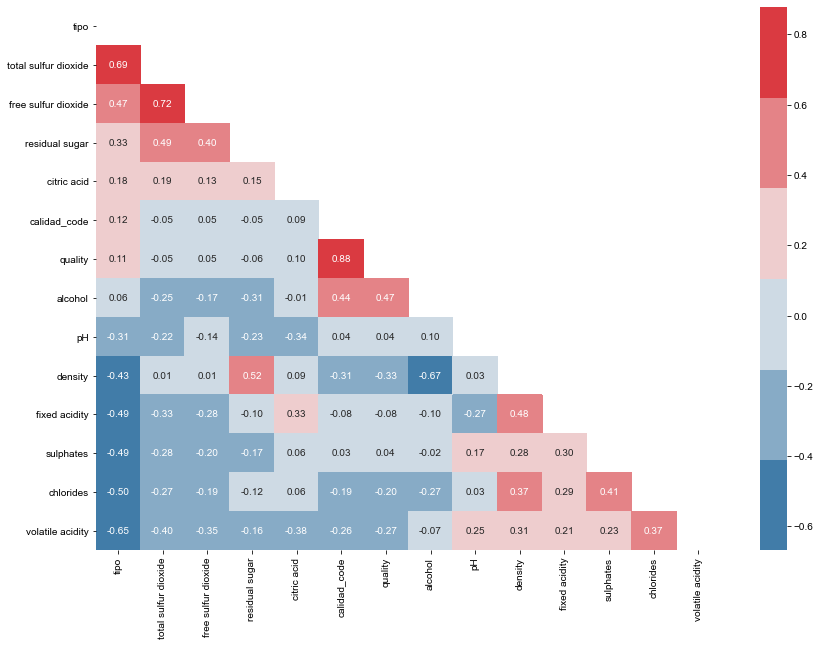

In [11]:
matriz_corr = vinos.corr()
matriz_corr_colores = matriz_corr.tipo.sort_values(ascending=False).keys()
matriz_corr_final = matriz_corr.loc[matriz_corr_colores,matriz_corr_colores]

plt.figure(figsize=(14,10))
dropSelf = np.zeros_like(matriz_corr_final)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(matriz_corr_final, cmap=sns.diverging_palette(240, 11 ), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.3)

Se observa una alta correlación según el **tipo de vino** entre el total de **dióxido de sulfuro**, el nivel de **dióxido de sulfuro libre** y el **ázucar residual**. Asi mismo, tiene una correlación negativa significativa con la **acidez corregida**, los **sulfatos**, los **cloruros** y la **ácidez volátil**.

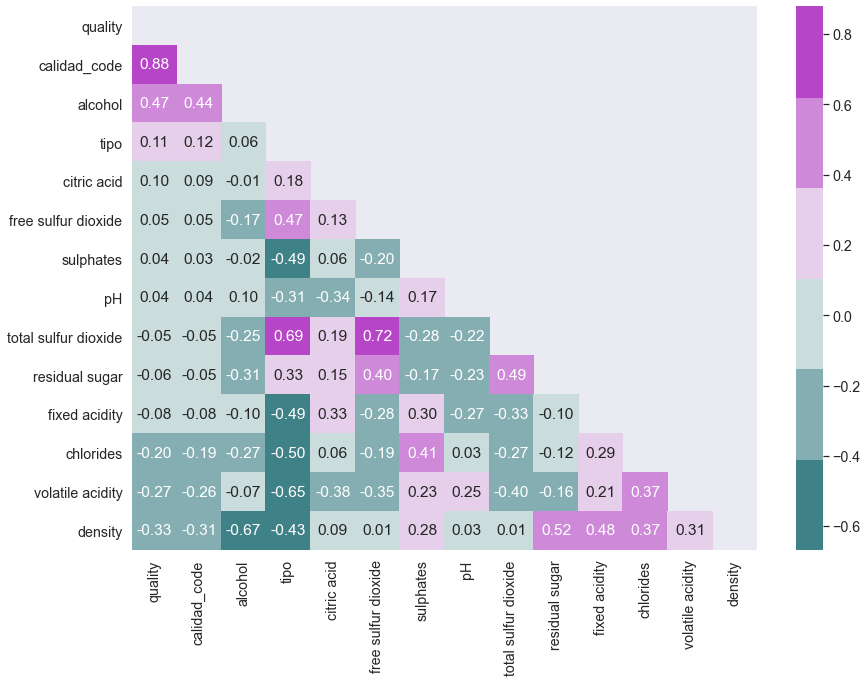

In [12]:
matriz_corr = vinos.corr()
matriz_corr_colores = matriz_corr.quality.sort_values(ascending=False).keys()
matriz_corr_final = matriz_corr.loc[matriz_corr_colores,matriz_corr_colores]

plt.figure(figsize=(14,10))
dropSelf = np.zeros_like(matriz_corr_final)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(matriz_corr_final, cmap=sns.diverging_palette(200, 300), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.3)

Se observa una alta correlación entre la **calidad del vino** y el **alcohol**, además de una correlación negativa significativa con la **acidez volátil** , la **densidad** y los **cloruros**.

#### Pasemos a observar la distribución de las variables

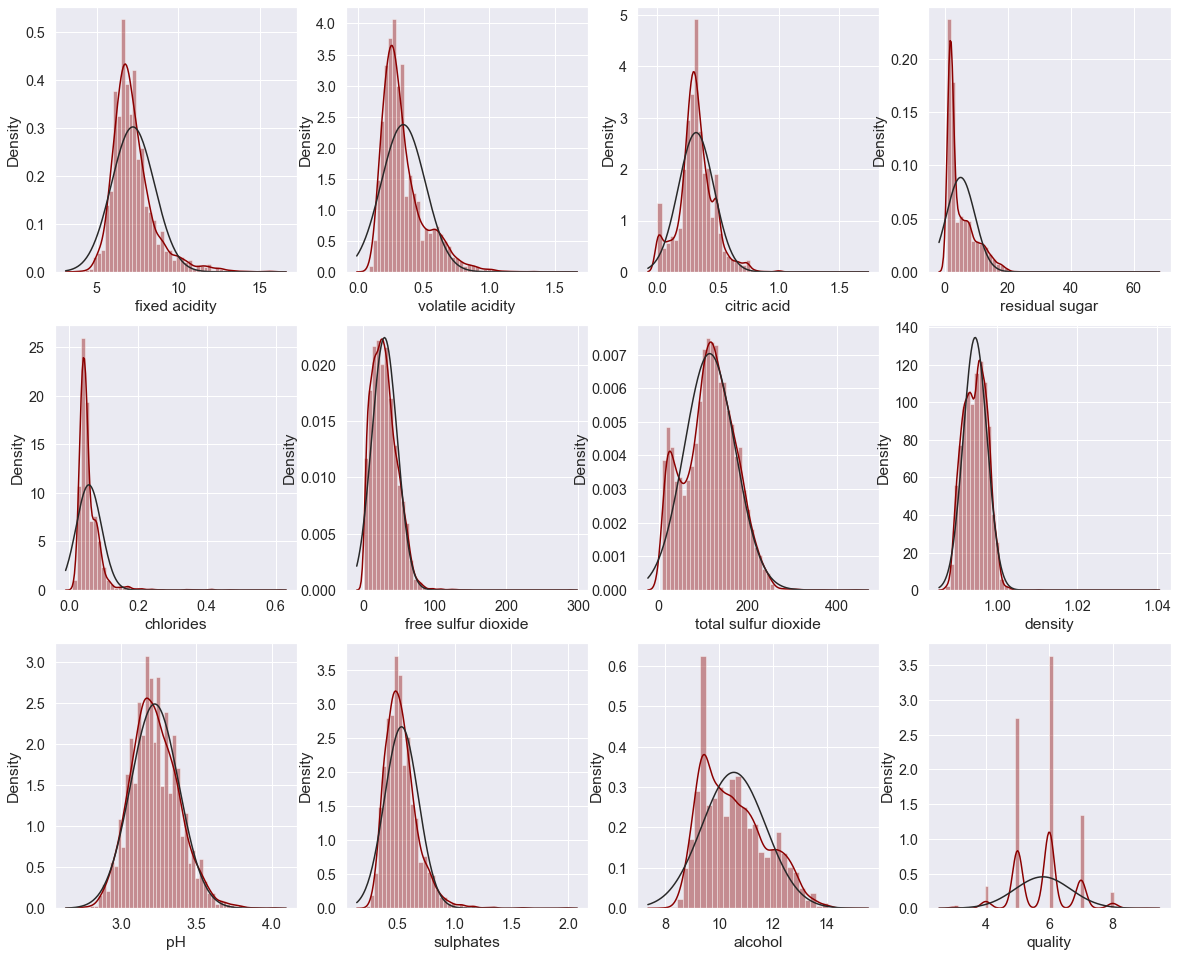

In [13]:
plt.figure(figsize = (20,40))

for i in range(1,13):
    plt.subplot(7,4,i)
    sns.distplot(vinos[vinos.columns[i]], fit=norm, color = "darkred")

Observamos que muchas feautures siguen una distribución parecida a la normal, si bien se detectan algunos outliers en varias de ellas. No obstante, no se detectan distribuciones extrañas. Se observa que existen bastantes valores bajos del **dióxido de sulfuro total** , que luego se reducen significativamente para volver a aumentar en cierto punto cercano al valor medio. Ocurre tambien en la **densidad** y **el ácido cítrico**.

Así mismo, se observa como la **ádicez volátil**, el **ázucar residual**, el **alcohol** y los **cloruros** siguen una distribución similar.

#### Comprobemos los outilers de las variables

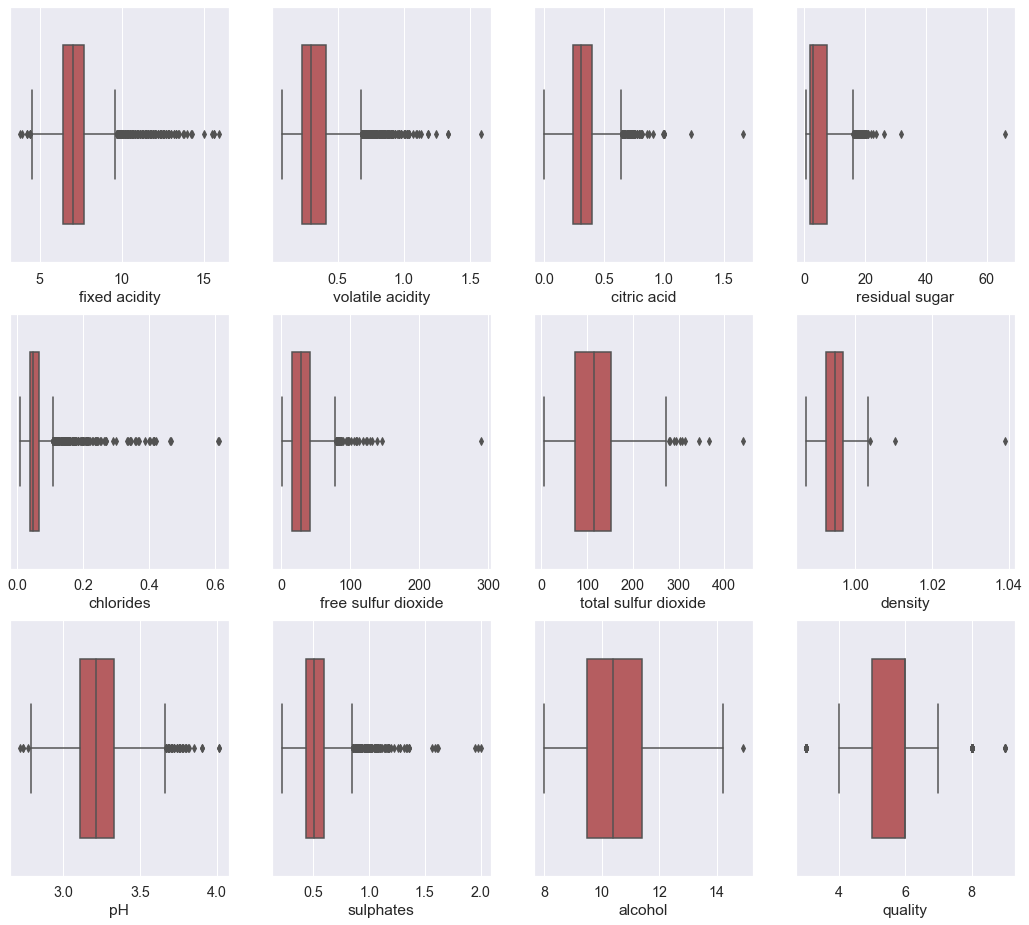

In [14]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(18,16))
ax = ax.flatten()
contador = 0
col = 1
for i in range(3):
    for j in range(4):
        plt.subplot(3,4, contador+1)
        sns.boxplot(vinos.iloc[:, col], color= "r", width=0.7)
        if col < vinos.shape[1] :
            contador += 1
            col+= 1

Los **cloruros**, **ácidez corregida**, **ácidez volátil**, **ácidez cítrica**, **sulfatos** y **ázucar residual** presentan bastantes outliers hacia la derecha, debido a que son atributos del vino que varian mucho en función de las decisiones en su fabricación. No obstante, no eliminaremos estos outliers para este proyecto.

#### Observemos cada feature en función del tipo de vino

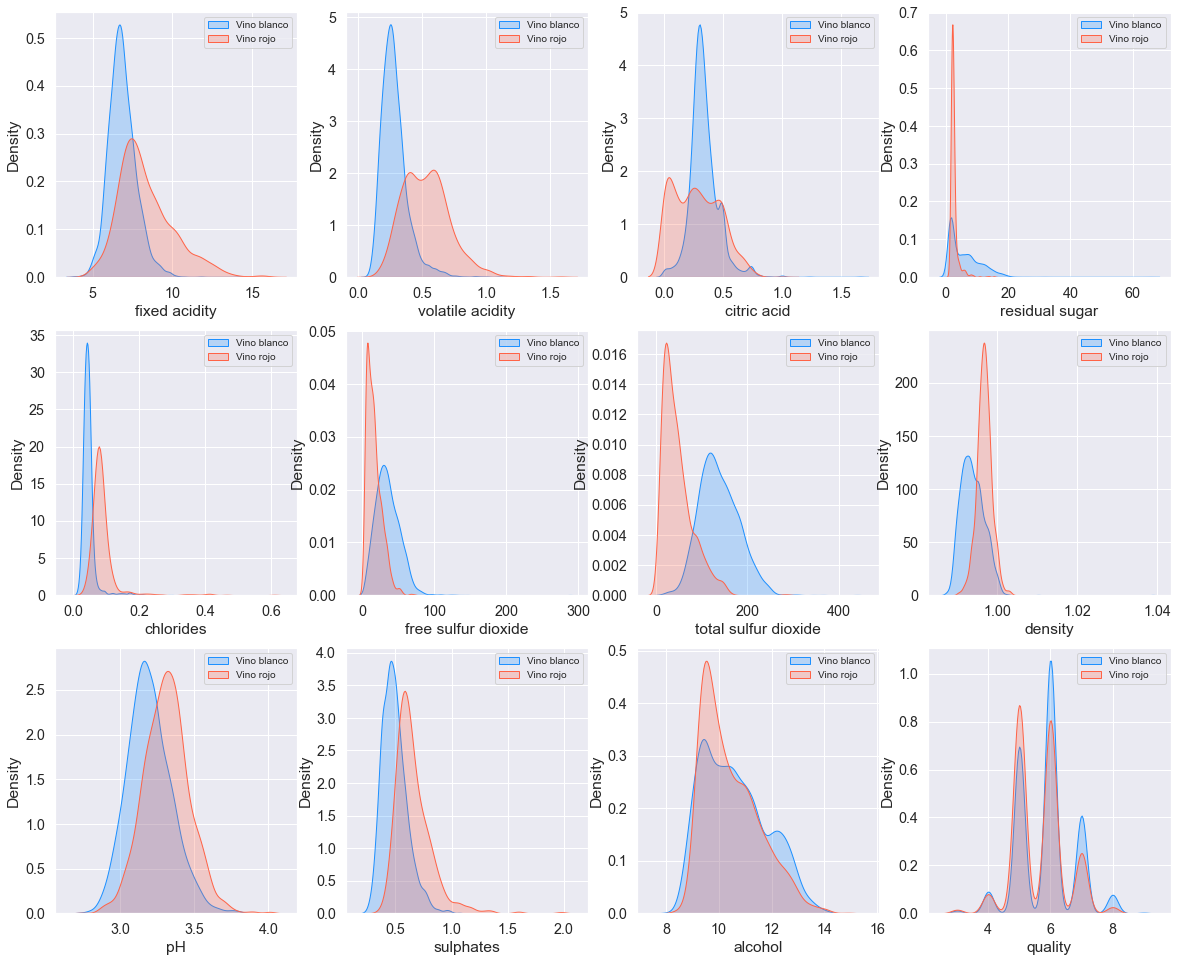

In [15]:
plt.figure(figsize = (20,40))

for i in range(1,13):
    plt.subplot(7,4,i)
    sns.kdeplot(vinos[vinos["color"] == "white"][vinos.columns[i]],shade = True, label = "Vino blanco", color="dodgerblue")
    sns.kdeplot(vinos[vinos["color"] == "red"][vinos.columns[i]],shade = True, label = "Vino rojo", color= "tomato")
    plt.legend(fontsize = "10")

Ya comenzamos a ver resultados significativos. Se observa que los vinos rojos tienen mayor nivel de **ácidez corregida** que los vinos blancos, al igual que de **ácidez volátil**, de **pH**, **densidad** y **cloruros**.

Los vinos blancos presentan mayores niveles de **dióxido de sulfuro libre y total**, **alchol** y **ázucar residual**. También se observa que hay mayor número de vinos blancos de **alta calidad** que de vinos rojos, aunque esto se comprobará mas adelante.

Es relevante observar el **ázucar residual**, puesto que los vinos rojos presentan muy poca en comparación con los vinos blancos. Esto ocurre igual en los niveles de **dioxido de sulfuro**.

#### Pasemos a comprobar cada feauture en función de la calidad del vino, utilizando la división previamente realizada para la calidad.

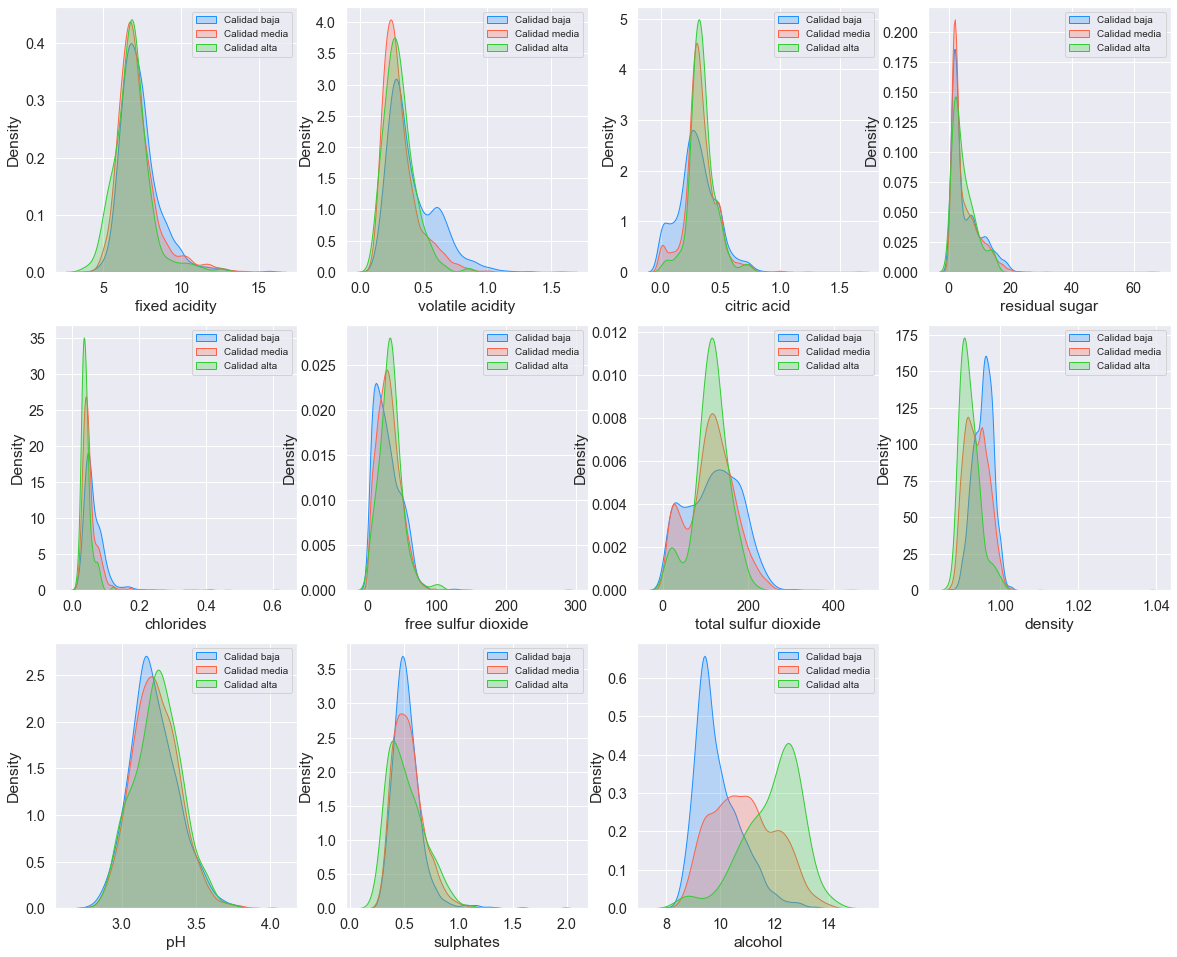

In [16]:
plt.figure(figsize = (20,40))

for i in range(1,12):
    plt.subplot(7,4,i)
    sns.kdeplot(vinos[vinos["calidad_code"] == 0][vinos.columns[i]],shade = True, label = "Calidad baja", color="dodgerblue")
    sns.kdeplot(vinos[vinos["calidad_code"] == 1][vinos.columns[i]],shade = True, label = "Calidad media", color= "tomato")
    sns.kdeplot(vinos[vinos["calidad_code"] == 2][vinos.columns[i]],shade = True, label = "Calidad alta", color= "limegreen")
    plt.legend(fontsize = "10")

Vemos la importancia del **alcohol** en la calidad del vino, puesto que la calidad del vino es mas alta para los vinos con mayor nivel de alcohol. Asi mismo, se observa que la calidad del vino se reduce cuanto mayor nivel de **densidad** tenga el vino. Se observa de igual manera los vinos de mayor calidad presentan unos niveles de **dióxidos de sulfuro totales y libre** mas concentrados en torno a un valor similar, al igual que con los **cloruros**, el **ácido cítrico** y un poco con el **ácido volátil**.El **pH**, los **sulfatos** y el **ázucar residual** no parecen mostrar diferencias para la calidad del vino.

#### Observemos mas en profundidad la relación entre la calidad del vino y el color.

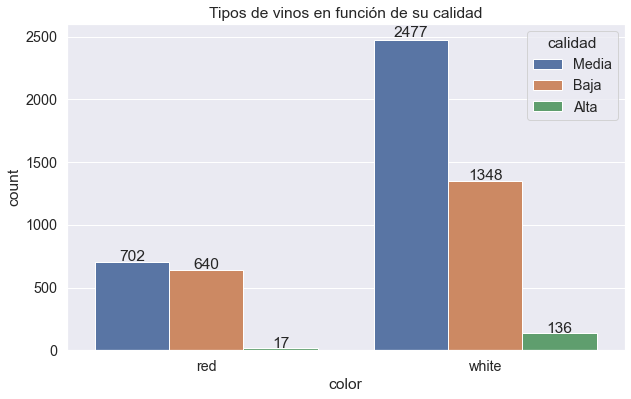

In [17]:
f,ax= plt.subplots(figsize=(10,6))

def show_values(axs, orient="v", space=.01): 
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

grafico = sns.countplot(x = "color", hue = "calidad" , data = vinos)
show_values(grafico)
plt.title("Tipos de vinos en función de su calidad")
plt.show()

Existe mayor número de vinos blancos que de rojos en el dataset, pero la proporción de vinos de calidad **media y alta** es mayor en los vinos blancos, por lo que se podría decir que **los vinos blancos tienen mayor calidad que los vinos rojos**.

# 3. Modelos de Clasificación

Una vez entendido nuestro dataset, procederemos a entrenar diferentes modelos de clasificación para encontrar el que mejor sea capaz de calsificar a un vino en **rojo** o **blanco** en función de las características previamente utilizadas. Vamos a utilizar todas las features del dataset para los modelos.

Procederemos a utilizar una copia de nuestro dataset, eliminando aquellas variables que creamos para el ánalisis exploratorio y dejando solo las númericas

In [18]:
vinos2 = vinos.copy()
vinos2 = vinos2.drop("color",1)
vinos2 = vinos2.drop("calidad",1)
vinos2 = vinos2.drop("calidad_code",1)

#### Separamos el dataset en train y test

In [19]:
from sklearn.model_selection import train_test_split

x = vinos2.drop("tipo",1)
y = vinos2["tipo"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=41)

Para este proyecto, utilizaremos seis modelos de clasificación:
 * Árbol de decisión
 * Random Forest
 * Regresión Logítica
 * Naive Bayes
 * SVM (Support Vector Machines)
 * K-Nearest Neighbor
 
Así mismo, utilizaremos **Pipelines**, excepto en el árbol y el random forest, para escalar los datos previamente y aplicar un **k best** en la regresión logística.

In [20]:
arbol = DecisionTreeClassifier()

random_forest = RandomForestClassifier()

regresionlogistica = Pipeline(steps=[("scaler",StandardScaler()),
                               ("kbest",SelectKBest()),
                               ("logreg",LogisticRegression())
                              ] )

naivebayes = Pipeline(steps=[("kbest",SelectKBest()),
                           ("nb",GaussianNB())])

svm = Pipeline(steps=[("scaler",StandardScaler()),
                            ("svm",SVC())])

kneighbors = Pipeline(steps=[("scaler",StandardScaler()),
                             ("knn", KNeighborsClassifier())])

Utilizaremos un **Grid Search** para encontrar los mejores hiperparámetros para nuestros modelos. Para ello, definimos los hiperparámetros.

In [21]:
grid_arbol = {"max_depth":list(range(1,15))}
grid_random_forest = {"n_estimators": [150], 
                     "max_depth": [3,5,10,15,20], 
                      "max_features": ["sqrt", 3, 4] 
                     }
grid_regresionlogistica = {"kbest__score_func": [f_classif], 
                     "kbest__k": [1,2,3,4,5,6,7,8,9,10,11,12],
                     
                     "logreg__penalty": ["l1","l2"], 
                     "logreg__C": [0.1, 0.5, 1.0, 5.0],
                     "logreg__fit_intercept": [True],
                     "logreg__max_iter": [50,100,500],  
                     "logreg__solver": ["liblinear"]
                    }
              
grid_svm = {"svm__C": [0.01, 0.1, 0.5, 1.0, 5.0, 50.0],
                  "svm__kernel": ["linear","rbf"],
                  "svm__degree": [2,3,4,5],
                  "svm__gamma": [0.001, 0.1, "auto", 1.0]
                 }
              
grid_naivebayes = {"kbest__score_func": [f_classif],
                 "kbest__k": [1,2,3]
                }

grid_Kneighbors = {"knn__n_neighbors": [3,5,7,9,11],
                  "knn__weights": ["uniform","distance"]} 

#### Definimos los Grid Search, con cross-validation de 10

In [22]:
gs_arbol = GridSearchCV(arbol,
                        grid_arbol,
                        cv=10,
                        scoring="accuracy",
                        verbose=1,
                        n_jobs=-1)
gs_random_forest = GridSearchCV(random_forest,
                                grid_random_forest,
                                cv=10,
                                scoring="accuracy",
                                verbose=1,
                                n_jobs=-1)
gs_regresionlogistica = GridSearchCV(regresionlogistica,
                               grid_regresionlogistica,
                               cv=10,
                               scoring="accuracy",
                               verbose=1,
                               n_jobs=-1)
gs_svm = GridSearchCV(svm,
                      grid_svm,
                      cv=10,
                      scoring="accuracy",
                      verbose=1,
                      n_jobs=-1)

gs_naivebayes = GridSearchCV(naivebayes,
                           grid_naivebayes,
                           cv=10,
                           scoring="accuracy",
                           verbose=1,
                           n_jobs=-1)

gs_Kneighbors = GridSearchCV(kneighbors,
                            grid_Kneighbors,
                            cv=10,
                            scoring="accuracy",
                            verbose=1,
                            n_jobs=-1)

#### Introducimos todos los Grid Search en un diccionario y aplicamos un bucle for para entrenarlos.

In [23]:
grid_searchs = {"gs_arbol":gs_arbol,
                "gs_random_forest":gs_random_forest,
                "gs_regresionlogistica":gs_regresionlogistica,
                "gs_svm":gs_svm,
                "gs_naivebayes":gs_naivebayes,
                "gs_Kneighbors":gs_Kneighbors
                }

for modelo,grid_search in grid_searchs.items():
    print("Grid search: %s..." % modelo)
    grid_search.fit(x_train,y_train)

Grid search: gs_arbol...
Fitting 10 folds for each of 14 candidates, totalling 140 fits
Grid search: gs_random_forest...
Fitting 10 folds for each of 15 candidates, totalling 150 fits
Grid search: gs_regresionlogistica...
Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Grid search: gs_svm...
Fitting 10 folds for each of 192 candidates, totalling 1920 fits
Grid search: gs_naivebayes...
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Grid search: gs_Kneighbors...
Fitting 10 folds for each of 10 candidates, totalling 100 fits


Una vez entrenados, procedemos a extraer el accuracy de cada modelo para obtener aquel con mayor score.

In [24]:
mejor_score = [(modelo, grid_search.best_score_) for modelo, grid_search in grid_searchs.items()]        
mejor_score_tabla = pd.DataFrame(mejor_score,columns=["Grid Search", "Score"])
mejor_score_tabla_final = (mejor_score_tabla.sort_values(by="Score", ascending=False))
mejor_score_tabla_final

,Grid Search,Score
3,gs_svm,0.995770
1,gs_random_forest,0.994125
2,gs_regresionlogistica,0.993890
5,gs_Kneighbors,0.992481
0,gs_arbol,0.981672
4,gs_naivebayes,0.948541


El **SVM** es el modelo que mejor consigue clasificar los vinos. Observemos que parámetros ha utilizado.

In [25]:
svmGS = grid_searchs["gs_svm"]
mejorpipeline = svmGS.best_estimator_
mejorpipeline.steps

[('scaler', StandardScaler()), ('svm', SVC(C=5.0, degree=2, gamma='auto'))]

Reentrenamos este modelo con los mejores hiperpárametros

In [26]:
mejorpipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=5.0, degree=2, gamma='auto'))])

Comprobamos el nivel de **accuracy**

In [27]:
accuracy = accuracy_score(y_true = y_test,
                          y_pred = mejorpipeline.predict(x_test))

print("Accuracy en test: %s" % accuracy)

Accuracy en test: 0.9971804511278195


Extraemos la matriz de confusión

In [28]:
matriz_confusion = confusion_matrix(y_true = y_test,
                                    y_pred = mejorpipeline.predict(x_test)
                                   )
matriz_confusion

array([[262,   2],
       [  1, 799]], dtype=int64)

Vemos que consigue unos resultados casi perfectos. Observemos los valores de **F1, precision y recall**

In [29]:
print(classification_report(y_test,mejorpipeline.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       264
           1       1.00      1.00      1.00       800

    accuracy                           1.00      1064
   macro avg       1.00      1.00      1.00      1064
weighted avg       1.00      1.00      1.00      1064



Por último, dibujamos su curva ROC

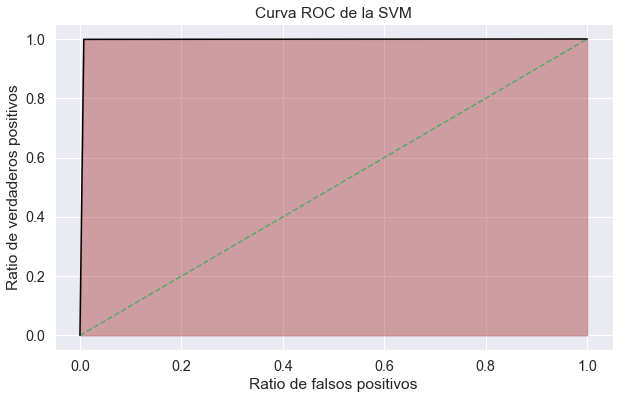

In [30]:
curvaroc = roc_curve(y_true=y_test,
                y_score=mejorpipeline.predict(x_test),
                pos_label=1.0  # Le decimos a roc_curve que los casos positivos son los unos.
               )

curvaroc

coordenadas_fpr = curvaroc[0]
coordenadas_tpr = curvaroc[1]

plt.figure(figsize=(10,6))


plt.plot([0,1],[0,1], "g--")

plt.plot(coordenadas_fpr, coordenadas_tpr, "black")


plt.fill_between(coordenadas_fpr, coordenadas_tpr, alpha=0.4, color="brown")

plt.title("Curva ROC de la SVM")
plt.xlabel("Ratio de falsos positivos")
plt.ylabel("Ratio de verdaderos positivos")
pass

Se ha obtenido el mejor modelo posible de clasificación. Este modelo de **SVM**, con los hiperparametros seleccionados, guardados en la variable **mejorpipeline**, ya puede ser utilizado para clasificar cualquier vino en vino rojo o blanco según las features obtenidas.

# 4. Modelos de Regresión

En esta ocasión, procederemos a entrenar varios modelos de regresión para encontrar el que mejor prediga la calidad de los vinos en funcion de las features analizadas previamente.

Comenzaremos dividiendo el dataset en train y test, pero esta vez estableciendo la target como **quality**

In [31]:
x = vinos2.drop("quality",1)
y = vinos2["quality"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=41)

Escalamos los datos 

In [32]:
scaler = StandardScaler()
col = x_train.copy().columns
x_train= pd.DataFrame(scaler.fit_transform(x_train), columns = col)
x_test= pd.DataFrame(scaler.fit_transform(x_test), columns = col)

Vamos a entrenar siete modelos de regresión:
 * Regresión Lineal
 * Regresión Ridge
 * Regresión Lasso
 * SGD (stochastic gradient descent)
 * Random Forest
 * SVR (Support Vector Regression)
 * K Neighbors

In [33]:
LR = LinearRegression()
ridge = Ridge()
lasso = Lasso()
sgd = SGDRegressor()
randomforest = RandomForestRegressor(random_state=41)
svm_reg = SVR()
knn = KNeighborsRegressor()

Vamos a utilizar dos funciones para obtener las métricas de los modelos

In [34]:
def print_evaluacion(true, predict):  
    mae = metrics.mean_absolute_error(true, predict)
    mse = metrics.mean_squared_error(true, predict)
    rmse = np.sqrt(metrics.mean_squared_error(true, predict))
    r2_square = metrics.r2_score(true, predict)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluacion(true, predict):
    mae = metrics.mean_absolute_error(true, predict)
    mse = metrics.mean_squared_error(true, predict)
    rmse = np.sqrt(metrics.mean_squared_error(true, predict))
    r2 = metrics.r2_score(true, predict)
    return [mae, mse, rmse, r2]

También usaremos el **Grid Search** para encontrar los mejores hiperpárametros.

In [35]:
grid_lr = {"fit_intercept": [True, False],
              "normalize":[True,False] 
             } 
                     
grid_ridge =  {'alpha': [1,0.1,0.01,0.001,0.0001,0] , 
               "fit_intercept": [True, False], 
               "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
              
grid_lasso = {'alpha': [1,0.1,0.01,0.001,0.0001,0]
                 }
              
grid_sgdreg = {'alpha': 10.0 ** -np.arange(1, 7),
            'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
            'penalty': ['l2', 'l1', 'elasticnet'],
            'learning_rate': ['constant', 'optimal', 'invscaling'],
            }

grid_random_forestreg = {"n_estimators": [50,100,200,300,500], 
                     "max_depth": [3,5,10,15,20], 
                      "max_features": ["sqrt", "auto"]
                        }
                
grid_svrreg = {'kernel': ('linear', 'rbf','poly'), 
            'C':[1.5, 10],
            'gamma': [1e-7, 1e-4],
            'epsilon':[0.1,0.2,0.5,0.3]
           }
grid_knnreg = {'weights': ['uniform'], 
               'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]} 

Definimos nuestras **Grid Searchs**, igual que en clasificación, con cross-validation de 10

In [36]:
gs_lr = GridSearchCV(LR,
                    grid_lr,
                    cv=10,
                    verbose=1,
                    n_jobs=-1)
gs_ridge = GridSearchCV(ridge,
                        grid_ridge,
                        cv=10,
                        verbose=1,
                        n_jobs=-1)
gs_lasso = GridSearchCV(lasso,
                        grid_lasso,
                        cv=10,
                        verbose=1,
                        n_jobs=-1)
gs_sgdreg = GridSearchCV(sgd,
                      grid_sgdreg,
                      cv=10,
                      verbose=1,
                      n_jobs=-1)

gs_random_forestreg = GridSearchCV(randomforest,
                           grid_random_forestreg,
                           cv=10,
                           verbose=1,
                           n_jobs=-1)

gs_svrreg = GridSearchCV(svm_reg,
                            grid_svrreg,
                            cv=10,
                            verbose=1,
                            n_jobs=-1)

gs_knnreg = GridSearchCV(knn,
                         grid_knnreg,
                         cv=10,
                         verbose=1,
                         n_jobs=-1)

Introducimos los gridsearchs en un diccionario y utilizamos el bucle for para entrenarlos.

In [37]:
gridsearchs = {"regresionlineal":gs_lr,
                "ridge":gs_ridge,
                "lasso":gs_lasso,
                "sgd":gs_sgdreg,
                "randomforest":gs_random_forestreg,
                "svm":gs_svrreg,
                "knn":gs_knnreg
              }

for modelo,grid_search in gridsearchs.items():
    print("Grid search: %s..." % modelo)
    grid_search.fit(x_train,y_train)

Grid search: regresionlineal...
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Grid search: ridge...
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Grid search: lasso...
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Grid search: sgd...
Fitting 10 folds for each of 162 candidates, totalling 1620 fits
Grid search: randomforest...
Fitting 10 folds for each of 50 candidates, totalling 500 fits
Grid search: svm...
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Grid search: knn...
Fitting 10 folds for each of 11 candidates, totalling 110 fits


Una vez entrenado, procedemos a obtener las siguientes métricas de los modelos en train y test:
  * MSE
  * MAE
  * R2 cuadrado
  * RMSE
  
Después, añadiremos en una tabla los resultados del test para una mejor comprobación.

In [38]:
gridsearchs = {"regresionlineal":gs_lr,
                "ridge":gs_ridge,
                "lasso":gs_lasso,
                "sgd":gs_sgdreg,
                "randomforest":gs_random_forestreg,
                "svm":gs_svrreg,
                "knn":gs_knnreg
              }
tablafinal = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R2 Square'])

for modelo,modelos in gridsearchs.items():
    print("Entrenando: %s..." % modelo)
    mejormodelo = modelos.best_estimator_
    test_pred = mejormodelo.predict(x_test)
    train_pred = mejormodelo.predict(x_train)
    print('Evaluacion del test:\n_____________________________________')
    print_evaluacion(y_test, test_pred)
    print('Evaluacion del train:\n_____________________________________')
    print_evaluacion(y_train, train_pred)
    evaluacionfinal = evaluacion(y_test, test_pred)
    tablafinal = tablafinal.append(pd.Series(evaluacionfinal, index = tablafinal.columns), ignore_index=True)
tablafinal.insert(loc = 0, column= "Modelo",value= ["Regresion Lineal","Regresion Ridge","Regresion Lasso","SGD", "Random Forest", "SVM","KNN"])

Entrenando: regresionlineal...
Evaluacion del test:
_____________________________________
MAE: 0.5433048930377165
MSE: 0.5000609470015258
RMSE: 0.7071498759114123
R2 Square 0.30243272780335206
__________________________________
Evaluacion del train:
_____________________________________
MAE: 0.5695328020974303
MSE: 0.5417585100117511
RMSE: 0.7360424648155507
R2 Square 0.3125771245586981
__________________________________
Entrenando: ridge...
Evaluacion del test:
_____________________________________
MAE: 0.5432052017677261
MSE: 0.4999825157815147
RMSE: 0.7070944178690104
R2 Square 0.3025421365714758
__________________________________
Evaluacion del train:
_____________________________________
MAE: 0.5695311167120746
MSE: 0.541759944361252
RMSE: 0.7360434391809032
R2 Square 0.3125753045510009
__________________________________
Entrenando: lasso...
Evaluacion del test:
_____________________________________
MAE: 0.5430370076023885
MSE: 0.49985610780433654
RMSE: 0.7070050267178704
R2 Squar

In [39]:
tablafinal

,Modelo,MAE,MSE,RMSE,R2 Square
0,Regresion Lineal,0.543305,0.500061,0.707150,0.302433
1,Regresion Ridge,0.543205,0.499983,0.707094,0.302542
2,Regresion Lasso,0.543037,0.499856,0.707005,0.302718
3,SGD,0.542956,0.503076,0.709279,0.298227
4,Random Forest,0.501577,0.431213,0.656668,0.398473
5,SVM,0.542401,0.501431,0.708118,0.300522
6,KNN,0.533224,0.478569,0.691787,0.332413


Observamos las distintas métricas de los modelos, pero para obtener una mejor visualización de los valores, crearemos una gráfica.

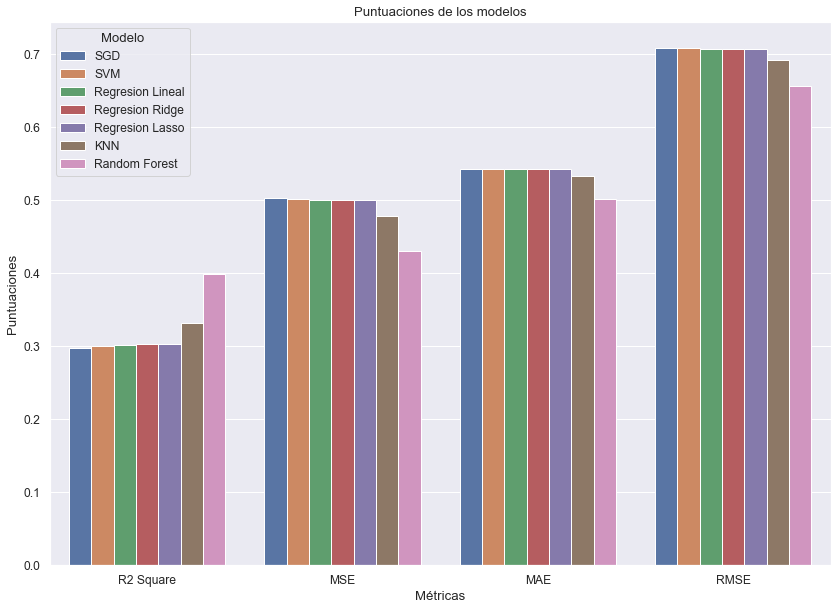

In [40]:
plt.figure(figsize=(14,10))
data = tablafinal.melt('Modelo', var_name='Métricas', value_name="Puntuaciones").sort_values("Puntuaciones")

sns.set(font_scale = 1.1)
sns.set_style("darkgrid")
ax=sns.barplot(y='Puntuaciones', x='Métricas', hue='Modelo', data=data)
plt.title("Puntuaciones de los modelos")
plt.show()


Observamos que el **Random Forest** es el modelo que mejor R2 presenta, además de los valores de error mas bajos. El modelo de **K-Neighbors** tambien ha mostrado buenos resultados. Vemos los valores optimos del Random Forest según el grid search.


In [41]:
gridsearchs["randomforest"].best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=41)

El Random Forest con profundidad 20, con 500 arboles realizados y con un numero máximo de features utilizados por árbol basado en *sqrt* es el mejor modelo regresor para determinar la calidad de los vinos. 

Las métricas obtenidas del mismo han sido:
  * **MSE:** 0.431
  * **MAE:** 0.501
  * **R2 cuadrado:** 0.398
  * **RMSE:** 0.656

Se observa que todos los modelos presentan una R2 cuadrado bastante baja. Esto se debe a que la variable target, la calidad del vino, solo presenta números enteros, mientras que el modelo de regresión devuelve números continuos. Por lo tanto, un vino de calidad 7 será predecido por el modelo como 7.4 o 6.6 en su mayoría. Por tanto, sería mas apropiado realizar un modelo de clasificación multiclase, con la variable calidad dividida en *baja*, *media* y *alta*, el cual devolveria un modelo mucho mas preciso.

### Con esto, ¡Terminamos nuestro proyecto de machine learning!